# [실습] 파이 차트와 히스토그램

파이 차트와 히스토그램은 모두 데이터의 분포를 보기에 적절한 그래프입니다.

## 1. 데이터 불러오기

먼저 실습 진행을 위해 `seaborn`과 `matplotlib`를 import 하겠습니다.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="AppleGothic")

데이터 분석에서 널리 사용되는 파이썬 패키지 중 하나인 pandas는 데이터를 처리하고 조작하는 데 필수적인 도구를 제공합니다. 

아래 코드에서는 `pandas`를 `pd`라는 이름으로 import 합니다.

In [3]:
import pandas as pd

실습에 사용할 데이터는 2016년 1월 1일부터 2019년 3월 31일까지의 서울대공원 입장객 데이터입니다. 데이터에는 날짜, 공휴일 여부, 입장객 연령 등 다양한 정보가 저장되어 있습니다.

`seoul_park.csv` 파일을 불러와 데이터 프레임 `df`에 저장합니다.

In [5]:
df = pd.read_csv("./data/seoul_park.csv")

이제 데이터 프레임 `df`에 서울대공원 입장객 데이터가 저장되어 있습니다.

`head(n)` 함수를 사용하면 데이터 프레임의 앞에서부터 `n`개의 데이터를 확인해볼 수 있습니다.

만약 `n`을 전달하지 않으면 5개의 데이터를 볼 수 있습니다.

In [6]:
df.head()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
0,0,2016-01-01,금,O,구름 조금,2799,141.0,419,47,0,4382,2016,1,1,33590000
1,1,2016-01-02,토,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,51730000
2,2,2016-01-03,일,O,구름 많음,2571,128.0,309,91,0,4557,2016,1,3,30080000
3,3,2016-01-04,월,X,구름 많음,602,463.0,235,51,223,1690,2016,1,4,8900000
4,4,2016-01-05,화,X,구름 많음,319,35.0,62,43,47,1256,2016,1,5,4160000


반대로 뒤에서부터 데이터를 확인하려면 `tail(n)` 함수를 사용합니다.

In [7]:
df.tail()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
1081,1081,2019-03-27,수,X,구름 많음,464,10.0,30,21,0,1117,2019,3,27,5040000
1082,1082,2019-03-28,목,X,구름 많음,687,46.0,28,35,108,1665,2019,3,28,7610000
1083,1083,2019-03-29,금,X,구름 조금,1447,120.0,77,14,188,2870,2019,3,29,16440000
1084,1084,2019-03-30,토,O,흐림,1326,44.0,169,29,115,2452,2019,3,30,15390000
1085,1085,2019-03-31,일,O,구름 조금,2563,111.0,387,53,0,4418,2019,3,31,30610000


이렇게 데이터를 불러왔다면 먼저 `head()`함수나 `tail()`함수를 이용해 데이터의 모양을 살펴보는 것이 좋습니다.

다음에는 `info()`함수를 이용해 데이터의 칼럼의 정보를 살펴보겠습니다.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1086 non-null   int64  
 1   날짜          1086 non-null   object 
 2   요일          1086 non-null   object 
 3   공휴일         1086 non-null   object 
 4   날씨          939 non-null    object 
 5   어른          1086 non-null   int64  
 6   청소년         1086 non-null   float64
 7   어린이         1086 non-null   int64  
 8   외국인         1086 non-null   int64  
 9   단체          1086 non-null   int64  
 10  총입장객수       1086 non-null   int64  
 11  연           1086 non-null   int64  
 12  월           1086 non-null   int64  
 13  일           1086 non-null   int64  
 14  매출액         1086 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 127.4+ KB


## 2. 파이 차트

파이 차트는 전체 데이터에서 그 범주에 해당하는 비율을 표현하여 범주간의 상대적인 비율을 비교할 때 유용한 시각화 방법입니다.

파이 차트는 원형으로 표현되며, 부채꼴의 중심각은 해당 범주의 상대적인 비율을 나타냅니다.

먼저 시각화를 실습하기 위해 필요한 데이터를 준비하겠습니다.

**2019년 데이터 가져오기**

먼저 df에서 2019년의 어른, 청소년, 어린이 입장객의 총합을 구해보겠습니다.

아래 코드는 "연"이 2019인 데이터를 고르고, "어른", "청소년", "어린이" 칼럼을 가져와 각각의 합을 구하는 코드입니다.

In [23]:
# 2019년의 어른, 청소년, 어린이 입장 분포 보기
data_2019 = df[df["연"] == 2019][["어른", "청소년", "어린이"]].sum()
data_2019

#df.loc[df['연']==2019 , ['어른','청소년','어린이']].sum()

어른     103125.0
청소년      3817.0
어린이     15209.0
dtype: float64

`data_2019`에 2019년에 "어른", "청소년", "어린이" 입장객 수의 합이 저장되었습니다.

파이 차트를 그리려면 데이터와 레이블이 필요합니다.

데이터는 각 범주의 숫자를 리스트로 전달하면 됩니다.

레이블은 각 비율이 어떤 항목의 비율인지 보여주기 위해 반드시 필요합니다.

아래 코드는 위에서 가져온 `data_2019`에서 데이터와 레이블을 가져오는 코드입니다.

In [24]:
labels = data_2019.index
data = data_2019
data

어른     103125.0
청소년      3817.0
어린이     15209.0
dtype: float64

`data`에 각각의 숫자가 들어갔으며, `label`에 각 숫자가 어떤 범주의 숫자인지 레이블 값이 저장되었습니다.

**파이 차트 그리기**

Matplotlib에서 파이 차트는 `plt.pie()`함수를 이용해 그릴 수 있습니다.

`plt.pie()`함수에 `x`, `labels` 매개변수를 전달하면 간단하게 파이 차트를 그릴 수 있습니다.

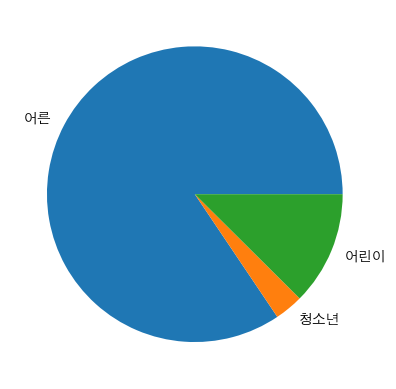

In [25]:
plt.pie(x=data, labels=labels)
plt.show()

위 그래프를 보면 어른 입장객의 비중이 압도적으로 큰 것을 확인할 수 있습니다.

**비율 표시하기**

위 파이 차트에서도 상대적인 비율은 대략적으로 확인이 가능하지만, 각 범주의 구체적인 비율을 수치로 표시하고 싶은 경우 `autopct` 매개변수에 포맷 문자열을 전달하면 됩니다.

아래 코드는 각 비율을 소수점 첫째 자리까지 보여줍니다.

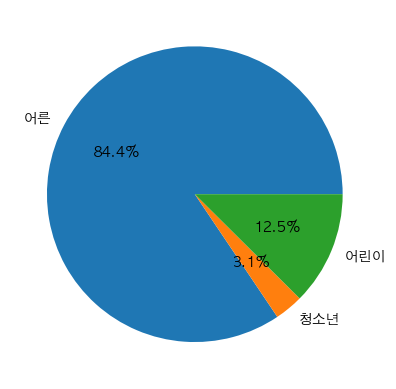

In [26]:
plt.pie(x=data, labels=labels, autopct="%1.1f%%")
plt.show()

## 3. 히스토그램

히스토그램(histogram)은 데이터의 분포를 시각화하는 그래프입니다. 

가로축은 데이터의 구간이나 범주를 의미하고, 세로축은 해당 구간에 속하는 데이터의 빈도수 또는 상대적인 비율을 나타냅니다. 

히스토그램은 각 구간의 빈도수를 막대 형태로 표현하여 데이터의 분포를 직관적으로 파악할 수 있게 해줍니다.

### 3-1. Matplotlib

Matplotlib에서 히스토그램은 `plt.hist()`함수를 이용해 그릴 수 있습니다.

`plt.hist()`함수에 분포를 살펴볼 데이터를 입력하면 간단한 히스토그램이 그려집니다.

막대의 길이는 이 구간에 속하는 데이터의 수를 나타냅니다.

토요일의 어린이 입장객 수의 분포를 히스토그램을 통해 시각화해보겠습니다.

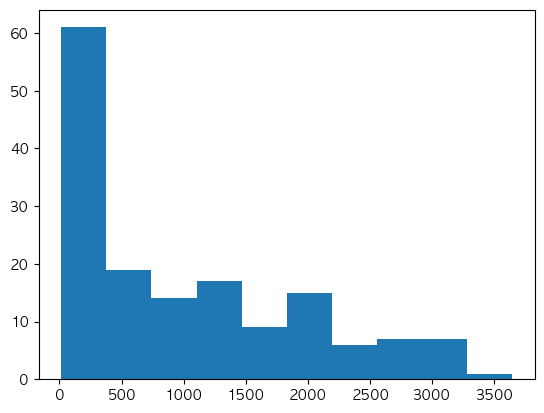

In [27]:
df_sat = df[df["요일"] == "토"]  # 토요일 데이터를 df_sat에 저장
df_sat

plt.hist(df_sat["어린이"], bins=10)  # bins: 몇개의 구간으로 나눌 것인가 -> 막대의 수
plt.show()

위 그래프를 보시면 0~250구간에 많이 분포되어 있는 것을 볼 수 있습니다.

**히스토그램 종류**

matplotlib에서는 몇 가지 유형의 히스토그램을 제공하는데, 해당 종류의 이름을 문자열로 `histtype`매개변수에 전달하면 됩니다.

위에서처럼 따로 전달하지 않으면 기본값인 `"bar"`가 적용됩니다.

아래 코드는 4가지 타입의 히스토그램을 보여주는 코드입니다.

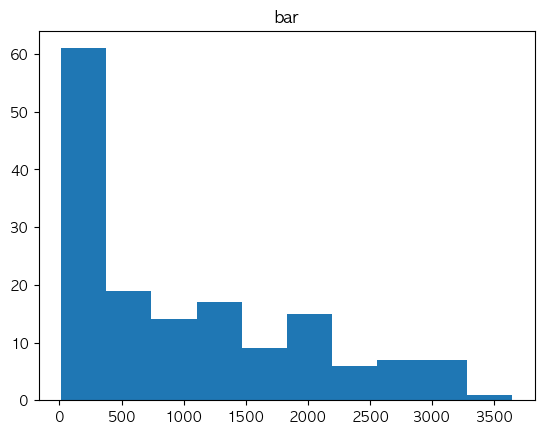

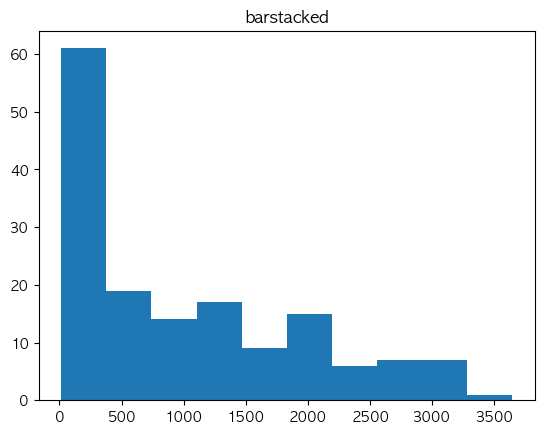

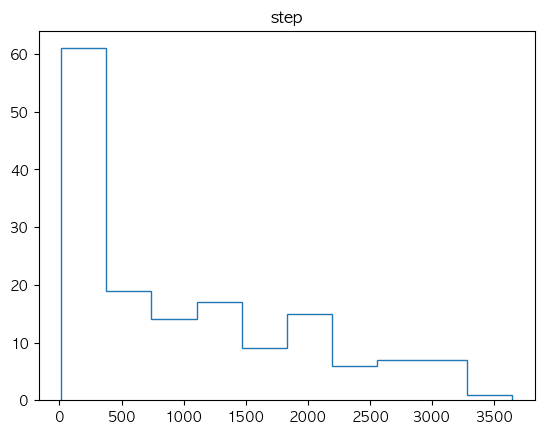

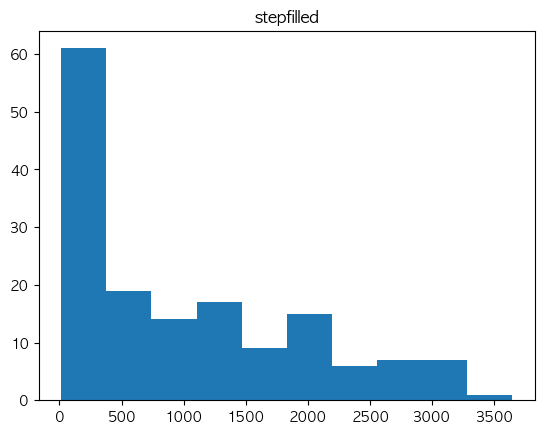

In [28]:
plt.hist(df_sat["어린이"], histtype="bar")
plt.title("bar")
plt.figure()

plt.hist(df_sat["어린이"], histtype="barstacked")
plt.title("barstacked")
plt.figure()

plt.hist(df_sat["어린이"], histtype="step")
plt.title("step")
plt.figure()

plt.hist(df_sat["어린이"], histtype="stepfilled")
plt.title("stepfilled")
plt.show()

### 3-2. Seaborn

seaborn에서는 `sns.histplot()`함수를 이용해 히스토그램을 그릴 수 있습니다.

seaborn은 `data` 매개변수를 통해 데이터 프레임을 통째로 전달하고 `x`, `y`에 그릴 칼럼의 이름을 문자열로 전달하면 간단하게 그래프를 그릴 수 있습니다.

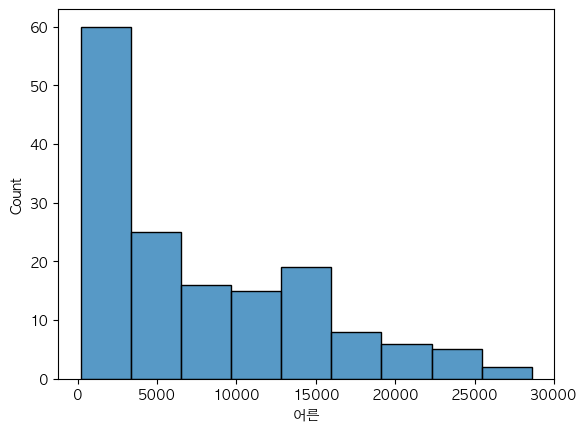

In [29]:
sns.histplot(data=df_sat, x="어른")
plt.show()

matplotlib만 사용하는 경우보다 깔끔한 그래프가 그려졌습니다.

**여러 개의 히스토그램 그리기**

경우에 따라 여러 범주의 데이터를 한 히스토그램에 같이 그려야 할 경우가 있습니다.

이렇게 그릴 경우 두 범주의 분포를 직관적으로 시각화할 수 있습니다.

연도별 2월 어린이 입장객의 수를 비교해보겠습니다.

2월의 데이터만 `df_feb`에 저장하고 `sns.histplot()`를 이용해 그래프를 그립니다.

이때 `hue`에 `"연"`을 전달하여 연도별로 나누어 그래프를 그리도록 합니다.

<Axes: xlabel='어린이', ylabel='Count'>

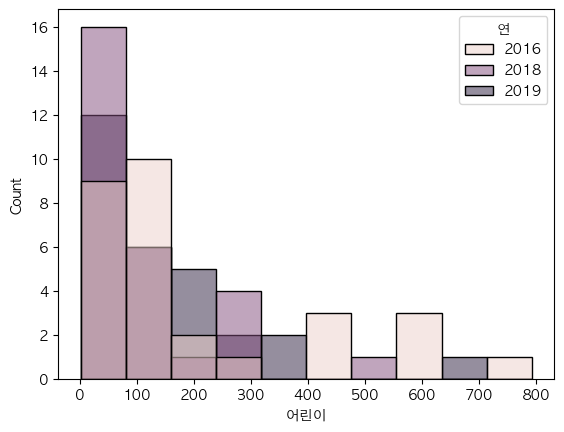

In [30]:
df_feb = df[df["월"] == 2]

sns.histplot(data=df_feb, x="어린이", hue="연")

이번에는 그래프의 구간을 좀 더 세밀하게 나누어보겠습니다.

구간을 몇개로 나눌 것인가에 해당하는 값은 위의 matplotlib와 동일하게 `bins` 매개변수에 전달하면 됩니다.

구간의 범위는 `binrange` 매개변수를 통해 설정합니다.

`binrange`를 따로 전달하지 않으면 자동으로 데이터의 최대, 최소 값으로 설정됩니다.

`binrange`에 (최소, 최대)순으로 값을 전달하면 구간의 범위를 설정할 수 있습니다.

아래 코드는 범위를 `0에서 1000`으로 고정하고 `20`개의 구간으로 나눠 그래프를 그립니다.

<Axes: xlabel='어린이', ylabel='Count'>

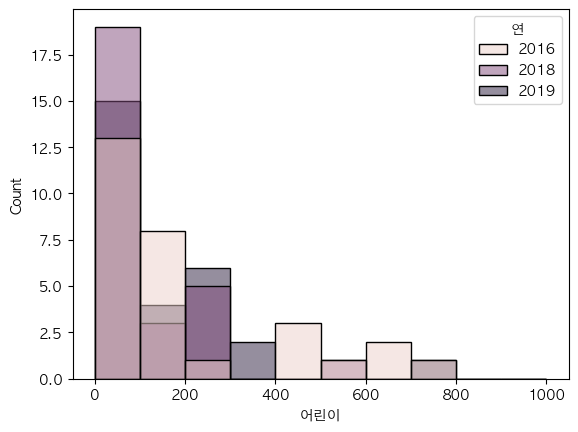

In [31]:
sns.histplot(data=df_feb, x="어린이", hue="연",binrange=(0,1000), bins = 10)

구간은 통일되었지만, 그래프가 겹쳐있어서 구분이 어렵습니다.

`histplot()`로 여러 히스토그램을 그릴땐 `multiple`매개변수를 통해 여러 그래프를 어떻게 그릴지 선택할 수 있습니다.

`multiple`을 따로 전달하지 않으면 `"layer"`로 설정되는데, 이 옵션은 각 그래프를 겹치게 그리면서 반투명하게 그려줍니다.

`multiple`에 `"dodge"`를 전달하여 그래프가 겹치지 않도록 그려보겠습니다.

또한 `shrink`옵션을 통해 막대간의 간격이 달라지도록 해보겠습니다.

<Axes: xlabel='어린이', ylabel='Count'>

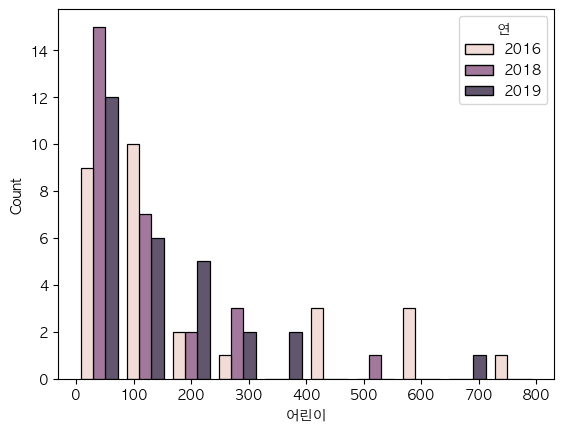

In [32]:
sns.histplot(
    data=df_feb,
    x="어린이",
    hue="연",
    binrange=(0, 800),
    bins=10,
    multiple="dodge",
    shrink=0.8,
)

## [TODO] 히스토그램 그리기

지금까지 배운 내용을 이용해서 2017년 4월의 어른 이용객의 히스토그램을 그리세요.

- `sns.histplot()`함수를 이용해 그립니다.
- `df_april2017`를 `data`로 전달합니다.
- x축은 "어른"으로 설정합니다.
- 구간은 `20`개로 나눕니다.

위에서 배운 내용을 활용하여 `None`을 지우고 코드를 작성하세요.

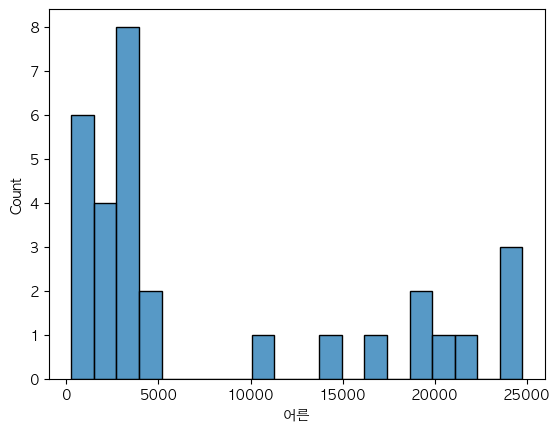

In [33]:
df_april2017 = df[(df["연"] == 2017) & (df["월"] == 4)]
todo1 = sns.histplot(data=df_april2017, x="어른", bins=20)

위조건을 만족하는 그래프를 그리면 아래와 같은 그래프가 나타납니다.

![](https://cdn-api.elice.io/api-attachment/attachment/0799bb6ae5334e8aa2daca67041a9885/output.png)

**위에서 문제를 해결하셨다면 아래 코드를 실행하시고 제출을 눌러보세요!**